In [46]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.graph_objs as go
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
#pip install -U kaleido

### **Define mean (mu) and covariance (Sigma) matrices for each cluster**

In [3]:
mu1 = [2, 2]
sigma1 = [[0.9, -0.0255], [-0.0255, 0.9]]

In [4]:
mu2 = [5, 5]
sigma2 = [[0.5, 0], [0, 0.3]]

In [5]:
mu3 = [-2, -2]
sigma3 = [[1, 0], [0, 0.9]]

In [6]:
mu4 = [-4, 8]
sigma4 = [[0.8, 0], [0, 0.6]]

### **Generate synthetic data by drawing samples from each distribution**

**For first cluster**

In [7]:
np.random.seed(0)
points_1 = np.random.default_rng().multivariate_normal(mu1, sigma1, 50)

In [8]:
points_1.shape

(50, 2)

In [9]:
points_1

array([[ 1.65299077,  3.59949171],
       [ 3.95656384,  2.33711096],
       [ 1.71725542,  1.25317379],
       [ 2.66945167,  1.49106679],
       [ 2.80467896,  1.21585457],
       [ 1.68658095,  1.18002435],
       [ 1.45188401,  2.61515004],
       [ 2.10010946,  2.10266592],
       [ 1.71410052,  1.4766392 ],
       [ 3.09193631,  1.97790128],
       [ 2.2527666 ,  2.20590271],
       [ 2.54805358,  1.6832594 ],
       [ 2.03308327,  1.11650905],
       [ 1.00857112,  1.96588878],
       [ 1.72824817,  2.01874737],
       [ 0.72921698,  2.40849123],
       [ 2.39925935,  2.26564644],
       [ 2.05620415,  4.09642247],
       [ 2.72629024,  3.19121677],
       [ 2.61861784,  3.69705978],
       [ 1.74876956,  3.60217466],
       [ 1.63888817,  2.52584073],
       [ 3.69761472,  2.19368121],
       [ 2.15820453,  1.69657259],
       [ 3.02089548,  3.04647464],
       [ 2.6079145 ,  1.54628551],
       [ 2.91912434,  0.73731828],
       [ 2.12942605,  1.62761383],
       [ 3.01415712,

In [10]:
points_1.mean(axis=0)

array([2.1263594 , 2.12108769])

In [11]:
np.cov(points_1.T)

array([[ 0.65593438, -0.03557189],
       [-0.03557189,  1.07923058]])

In [78]:
px.scatter(x = points_1[:, 0], y = points_1[:, 1], width = 700, height = 500, color_discrete_sequence = ['slateblue'], title = 'First Cluster')

In [13]:
points = points_1
points.shape

(50, 2)

**For second cluster**

In [14]:
np.random.seed(0)
points_2 = np.random.default_rng().multivariate_normal(mu2, sigma2, 50)

In [15]:
points_2.mean(axis=0)

array([4.96791903, 5.05070507])

In [16]:
np.cov(points_2.T)

array([[0.55123778, 0.03848373],
       [0.03848373, 0.25780751]])

In [79]:
px.scatter(x = points_2[:, 0], y = points_2[:, 1], width = 700, height = 500, color_discrete_sequence = ['darkolivegreen'], title = 'Second Cluster')

In [18]:
points = np.vstack((points, points_2))
points.shape

(100, 2)

**For third cluster**

In [19]:
np.random.seed(0)
points_3 = np.random.default_rng().multivariate_normal(mu3, sigma3, 50)

In [20]:
points_3.mean(axis=0)

array([-1.91597715, -2.00650838])

In [21]:
np.cov(points_3.T)

array([[0.69579704, 0.0520903 ],
       [0.0520903 , 1.09449044]])

In [80]:
px.scatter(x = points_3[:, 0], y = points_3[:, 1], width = 700, height = 500, color_discrete_sequence = ['chocolate'], title = 'Third Cluster')

In [23]:
points = np.vstack((points, points_3))
points.shape

(150, 2)

**For fourth cluster**

In [24]:
np.random.seed(0)
points_4 = np.random.default_rng().multivariate_normal(mu4, sigma4, 50)

In [25]:
points_4.mean(axis=0)

array([-4.03106115,  8.03289534])

In [26]:
np.cov(points_4.T)

array([[ 1.29508436, -0.20793163],
       [-0.20793163,  0.67038734]])

In [81]:
px.scatter(x = points_4[:, 0], y = points_4[:, 1], width = 700, height = 500, color_discrete_sequence = ['indianred'], title = 'Fourth Cluster')

In [28]:
points = np.vstack((points, points_4))
points.shape

(200, 2)

In [29]:
fig = go.Figure()


trace_1 = go.Scatter(x = points_1[:, 0],
                     y = points_1[:, 1],
                     name='Cluster 1',
                     mode='markers',
                     marker=go.Marker(color= 'slateblue'),
                     showlegend=True
)

trace_2 = go.Scatter(x = points_2[:, 0],
                     y = points_2[:, 1],
                     name='Cluster 2',
                     mode='markers',
                     marker=go.Marker(color= 'darkolivegreen'),
                     showlegend=True
)

trace_3 = go.Scatter(x = points_3[:, 0],
                     y = points_3[:, 1],
                     name='Cluster 3',
                     mode='markers',
                     marker=go.Marker(color= 'chocolate'),
                     showlegend=True
)

trace_4 = go.Scatter(x = points_4[:, 0],
                     y = points_4[:, 1],
                     name='Cluster 4',
                     mode='markers',
                     marker=go.Marker(color= 'indianred'),
                     showlegend=True
)

fig.add_trace(trace_1)
fig.add_trace(trace_2)
fig.add_trace(trace_3)
fig.add_trace(trace_4)
fig.update_layout(width = 700, height=500)
fig.update_layout({'title': {'text': 'Data Plot'}})

fig.show()
fig.write_image('Data Plot.png')

/usr/local/lib/python3.10/dist-packages/plotly/graph_objs/_deprecations.py:434: DeprecationWarning:

plotly.graph_objs.Marker is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Marker
  - plotly.graph_objs.histogram.selected.Marker
  - etc.




### Plot Elbow Plot using WCSS scores

**For cross-checking Elbow Plot**

In [30]:
from yellowbrick.cluster import KElbowVisualizer

In [31]:
km = KMeans(random_state=0)
visualizer = KElbowVisualizer(km, k=(1, 21))

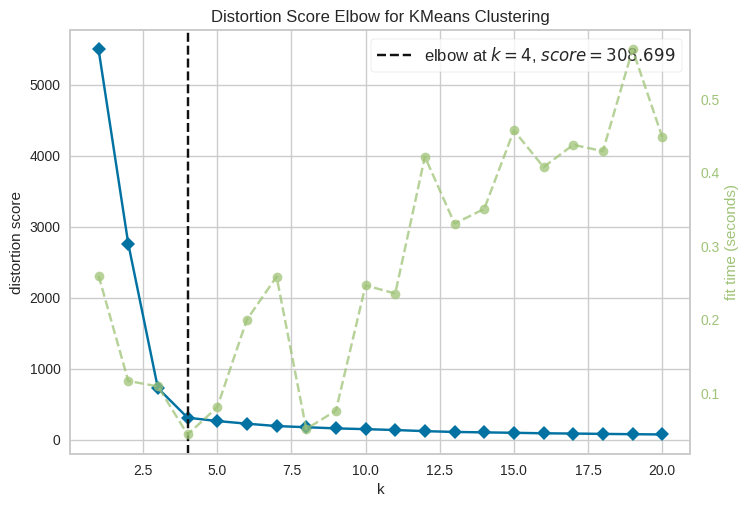

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [32]:
visualizer.fit(points)
visualizer.show()

**Finding WCSS scores using Kmeans inertia**

In [33]:
wcss = []

for clustering_no in range(1, 21):
  kmeans = KMeans(n_clusters = clustering_no, random_state = 0)       # Create a K-Means instance
  kmeans.fit(points)                                                # Fit the K-Means instance to generated data
  wcss.append(kmeans.inertia_)                                      # Compute WCSS and append it to the list

In [34]:
wcss

[5499.055374550814,
 2762.480861241552,
 725.1264800176862,
 308.69850215507245,
 261.6856455555232,
 224.4319449690975,
 191.0912438982093,
 174.33111281129055,
 158.21035262459503,
 147.23999351446105,
 135.03011598459437,
 119.27975396032721,
 107.7832769406696,
 101.86205201269166,
 96.10564453574597,
 88.9350535083434,
 85.38550442090519,
 80.41926189513822,
 76.30901455025094,
 72.33274934263059]

In [35]:
fig = px.line(x = range(1, 21), y = wcss, title='Elbow Method Plot', markers=True, width = 700, height = 500)
fig.add_vline(x=4, line_width=2.5, line_dash = 'dash', line_color = 'black')
fig.add_annotation(x=20, y=4800, text= f'Elbow at k = 4, wcss = {wcss[3]}', showarrow = False)
fig.show()
fig.write_image('Elbow Method Plot.png')

In [51]:
num_clusters = 4

## Perform K-Means Clustering

In [36]:
kmeans = KMeans(n_clusters = num_clusters, random_state = 0)       # Create a K-Means instance
clusters = kmeans.fit_predict(points)

In [37]:
predicted_labels = kmeans.labels_
print(len(predicted_labels))
predicted_labels

200


array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

In [47]:
silhouette_avg = silhouette_score(points, predicted_labels)
print(f'The average silhouette_score for random_state = 0 is : {silhouette_avg}')

The average silhouette_score for random_state = 0 is : 0.7015316702214355


[]

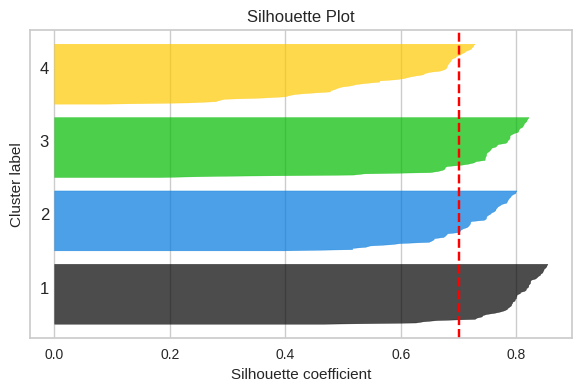

In [76]:
fig, (ax1) = plt.subplots(1, 1)
fig.set_size_inches(7, 4)

sample_silhouette_values = silhouette_samples(points, predicted_labels)

y_lower = 10
for i in range(num_clusters):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = sample_silhouette_values[predicted_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / num_clusters)
    ax1.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        facecolor = color,
        edgecolor = color,
        alpha = 0.7,
    )

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.025, y_lower + 0.5 * size_cluster_i, str(i + 1))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

ax1.set_title('Silhouette Plot')
ax1.set_xlabel('Silhouette coefficient')
ax1.set_ylabel('Cluster label')

# The vertical line for average silhouette score of all the values
ax1.axvline(x = silhouette_avg, color='red', linestyle='--')

ax1.set_yticks([])  # Clear the yaxis labels / ticks


In [71]:
fig = go.Figure()


trace_1 = go.Scatter(x = points[predicted_labels == 3, 0],
                     y = points[predicted_labels == 3, 1],
                     name = 'Cluster 1',
                     mode = 'markers',
                     marker=go.Marker(color = 'slateblue'),
                     showlegend=True
)

trace_2 = go.Scatter(x = points[predicted_labels == 1, 0],
                     y = points[predicted_labels == 1, 1],
                     name = 'Cluster 2',
                     mode = 'markers',
                     marker = go.Marker(color = 'darkolivegreen'),
                     showlegend = True
)

trace_3 = go.Scatter(x = points[predicted_labels == 2, 0],
                     y = points[predicted_labels == 2, 1],
                     name = 'Cluster 3',
                     mode = 'markers',
                     marker = go.Marker(color = 'chocolate'),
                     showlegend = True
)

trace_4 = go.Scatter(x = points[predicted_labels == 0, 0],
                     y = points[predicted_labels == 0, 1],
                     name = 'Cluster 4',
                     mode = 'markers',
                     marker = go.Marker(color = 'indianred'),
                     showlegend = True
)

# Represent cluster centers.
trace_5 = go.Scatter(x=kmeans.cluster_centers_[:, 0],
                     y=kmeans.cluster_centers_[:, 1],
                     name ='Cluster centers',
                     mode = 'markers',
                     marker=go.Marker(symbol = 'x',
                                       size = 8,
                                       color = 'black'),
                     showlegend = True
)

fig.add_trace(trace_1)
fig.add_trace(trace_2)
fig.add_trace(trace_3)
fig.add_trace(trace_4)
fig.add_trace(trace_5)
fig.update_layout(width = 800, height=500)
fig.update_layout({'title': {'text': 'Clustered Data Plot'}})

fig.show()
fig.write_image('Clustered Data Plot.png')